# Actividad N° 03: HR Employee Attrition

## Integrantes

**Grupo N° 03**

- Adriana Villalobos
- Gustavo Ledesma
- Alejo Cuello

## Descripción de la actividad

Trabajamos sobre el conjunto de datos *HR-Employee-Attrition.csv*. El objetivo de la actividad es realizar un análisis exploratorio de datos para el área de Recursos Humanos. El dataset proviene de Kaggle: [HR Analytics dataset](https://www.kaggle.com/datasets/rishikeshkonapure/hr-analytics-prediction)

### Consigna

**_AED 1_**
- Para el punto 4) de variables categóricas, analicen la columna `EducationField`
- Para el Análisis cuantitativo de variables categóricas, analicen `MaritalStatus`
- Con respecto a la consulta por query, consideren `t_country.query("frequency<=500")['MaritalStatus']`

**_AED 2_**
- Para el punto 1) Análisis de variables categóricas, consideren la columna `BusinessTravel`
- En 2.A) Análisis de categórica vs. categórica, consideren `BusinessTravel` vrs. `MaritalStatus`. También analicen `Gender` vrs. `Department`
- En 2.B) Análisis de numérica vs. categórica, consideren `Gender` vrs. `JobSatisfaction`
- Para el Promedio de todas las variables, nuestra variable a predecir es `Gender`
- En 2.C) Análisis de numérica vs. numérica `JobLevel` vrs. `StockOptionLevel`
- Para el Promedio de todas las variables, nuestra variable a predecir es `Age`
- Para todos los puntos 3) consideren `JobSatisfaction` vrs. `Gender`

**_Correlación_**
- Para 4) One hot encoding analicen que pasa con `data_test[['MaritalStatus_Divorced', 'MaritalStatus_Married', 'MaritalStatus_Single']]`

**Objetivo**
- El objetivo es que una vez corrido todo el notebook, saquen **7** insights del análisis que les pareció relevante.

# Código

## Importación e instalación de librerías

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Carga de datos

In [2]:
data = pd.read_csv('HR-Employee-Attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


*Para el punto 4) de variables categóricas, analicen la columna `EducationField`*

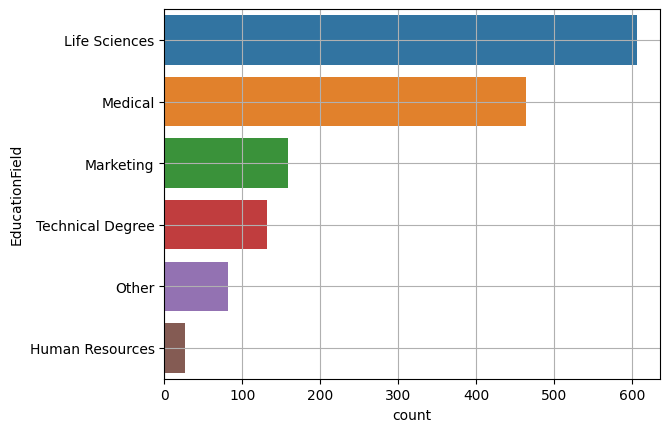

In [3]:
sns.countplot(y=data["EducationField"], order=data["EducationField"].value_counts().index)
plt.grid(True)

*Para el Análisis cuantitativo de variables categóricas, analicen `MaritalStatus`*

In [4]:
quantitative_information = data["MaritalStatus"].value_counts(ascending=False, dropna=False).to_frame()
quantitative_information["pct"] = data["MaritalStatus"].value_counts(ascending=False, dropna=False, normalize=True).values
quantitative_information["cumulative_pct"] = quantitative_information["pct"].cumsum()
quantitative_information

,count,pct,cumulative_pct
MaritalStatus,,,
Married,673,0.457823,0.457823
Single,470,0.319728,0.777551
Divorced,327,0.222449,1.000000


*Con respecto a la consulta por query, consideren `t_country.query("frequency<=500")['MaritalStatus']`*

In [5]:
quantitative_information[quantitative_information["count"] > 500]

,count,pct,cumulative_pct
MaritalStatus,,,
Married,673,0.457823,0.457823


*Para el punto 1) Análisis de variables categóricas, consideren la columna `BusinessTravel`*

In [6]:
quantitative_information = data["BusinessTravel"].value_counts(ascending=False, dropna=False).to_frame()
quantitative_information["pct"] = data["BusinessTravel"].value_counts(ascending=False, dropna=False, normalize=True).values
quantitative_information["cumulative_pct"] = quantitative_information["pct"].cumsum()
quantitative_information

,count,pct,cumulative_pct
BusinessTravel,,,
Travel_Rarely,1043,0.709524,0.709524
Travel_Frequently,277,0.188435,0.897959
Non-Travel,150,0.102041,1.000000


*En 2.A) Análisis de categórica vs. categórica, consideren `BusinessTravel` vrs. `MaritalStatus`. También analicen `Gender` vrs. `Department`*

In [7]:
pd.crosstab(data["BusinessTravel"], data["MaritalStatus"])

MaritalStatus,Divorced,Married,Single
BusinessTravel,,,
Non-Travel,44,59,47
Travel_Frequently,63,118,96
Travel_Rarely,220,496,327


In [8]:
pd.crosstab(data["Gender"], data["Department"])

Department,Human Resources,Research & Development,Sales
Gender,,,
Female,20,379,189
Male,43,582,257


*En 2.B) Análisis de numérica vs. categórica, consideren `Gender` vrs. `JobSatisfaction`*

In [9]:
data.groupby('Gender')['JobSatisfaction'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,588.0,2.683673,1.096038,1.0,2.0,3.0,4.0,4.0
Male,882.0,2.758503,1.106970,1.0,2.0,3.0,4.0,4.0


*Para el Promedio de todas las variables, nuestra variable a predecir es `Gender`*

In [10]:
numeric_data = data.select_dtypes(include=['int', 'float'])
numeric_data.groupby(data['Gender']).mean().T

Gender,Female,Male
Age,37.329932,36.653061
DailyRate,808.273810,798.626984
DistanceFromHome,9.210884,9.180272
Education,2.933673,2.899093
EmployeeCount,1.000000,1.000000
EmployeeNumber,1008.239796,1035.948980
EnvironmentSatisfaction,2.721088,2.722222
HourlyRate,65.903061,65.883220
JobInvolvement,2.714286,2.740363
JobLevel,2.117347,2.028345


*En 2.C) Análisis de numérica vs. numérica `JobLevel` vrs. `StockOptionLevel`*

In [11]:
data.groupby('JobLevel')['StockOptionLevel'].describe()

,count,mean,std,min,25%,50%,75%,max
JobLevel,,,,,,,,
1,543.0,0.745856,0.879164,0.0,0.0,1.0,1.0,3.0
2,534.0,0.838951,0.853367,0.0,0.0,1.0,1.0,3.0
3,218.0,0.825688,0.840715,0.0,0.0,1.0,1.0,3.0
4,106.0,0.783019,0.816552,0.0,0.0,1.0,1.0,3.0
5,69.0,0.739130,0.699836,0.0,0.0,1.0,1.0,3.0


In [12]:
data.groupby('StockOptionLevel')['JobLevel'].describe()

,count,mean,std,min,25%,50%,75%,max
StockOptionLevel,,,,,,,,
0,631.0,1.988906,1.090305,1.0,1.0,2.0,2.0,5.0
1,596.0,2.167785,1.170521,1.0,1.0,2.0,3.0,5.0
2,158.0,2.056962,0.911663,1.0,1.0,2.0,2.0,5.0
3,85.0,1.905882,1.053605,1.0,1.0,2.0,2.0,5.0


*Para el Promedio de todas las variables, nuestra variable a predecir es `Age`*

In [13]:
numeric_data = data.select_dtypes(include=['int', 'float'])
numeric_data.groupby(data['Age']).mean()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,,,,,,,,,,,,,,,,,,,,,
18,18.0,747.625000,6.125000,2.500000,1.0,1053.625000,2.750000,68.125000,2.875000,1.000000,...,3.125000,80.0,0.000000,0.000000,2.500000,3.000000,0.000000,0.000000,0.000000,0.000000
19,19.0,548.444444,10.555556,2.111111,1.0,675.666667,2.444444,63.555556,2.444444,1.000000,...,2.888889,80.0,0.000000,0.888889,3.000000,3.222222,0.777778,0.222222,0.111111,0.111111
20,20.0,819.454545,7.090909,2.636364,1.0,1021.000000,3.181818,61.909091,2.636364,1.000000,...,2.363636,80.0,0.000000,1.545455,2.727273,2.909091,1.545455,1.000000,0.636364,1.181818
21,21.0,762.846154,9.076923,1.615385,1.0,951.538462,2.692308,67.307692,2.692308,1.000000,...,2.692308,80.0,0.000000,1.923077,3.538462,2.769231,1.846154,1.230769,1.076923,1.076923
22,22.0,806.937500,8.437500,1.812500,1.0,869.250000,2.812500,69.812500,2.750000,1.125000,...,2.250000,80.0,0.750000,2.687500,3.062500,2.750000,2.062500,1.312500,0.937500,1.312500
23,23.0,707.928571,9.142857,1.857143,1.0,1225.500000,2.857143,66.071429,3.214286,1.071429,...,2.714286,80.0,0.785714,3.357143,2.642857,2.928571,2.642857,1.714286,0.500000,1.642857
24,24.0,863.115385,11.884615,2.115385,1.0,1011.384615,2.500000,62.615385,2.807692,1.269231,...,2.769231,80.0,1.115385,4.153846,2.692308,2.769231,3.346154,1.884615,0.884615,1.692308
25,25.0,768.076923,8.769231,1.923077,1.0,1005.307692,2.538462,65.961538,2.846154,1.500000,...,2.846154,80.0,0.769231,5.269231,3.038462,2.769231,3.846154,2.692308,0.884615,2.615385
26,26.0,844.769231,10.230769,2.641026,1.0,981.051282,2.384615,62.384615,2.564103,1.307692,...,2.538462,80.0,0.717949,5.615385,2.897436,2.666667,4.692308,3.666667,1.641026,3.000000


*Para todos los puntos 3) consideren `JobSatisfaction` vrs. `Gender`*

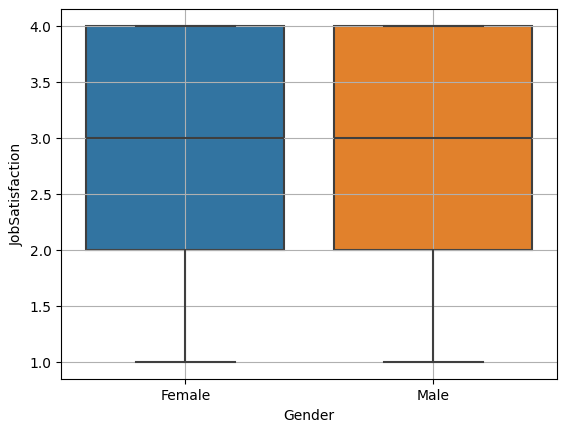

In [14]:
sns.boxplot(y = 'JobSatisfaction', x = 'Gender', data = data)
plt.grid(True)

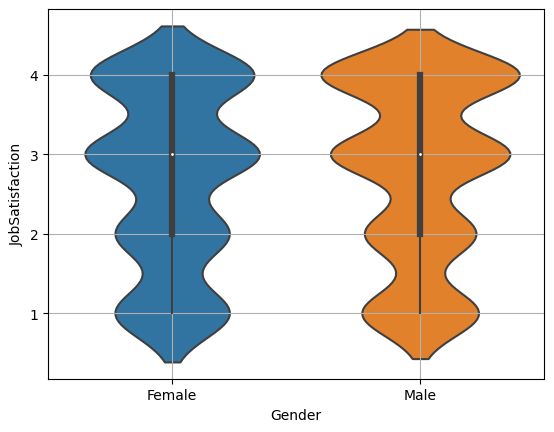

In [15]:
sns.violinplot(y='JobSatisfaction', x = 'Gender', data = data)
plt.grid(True)

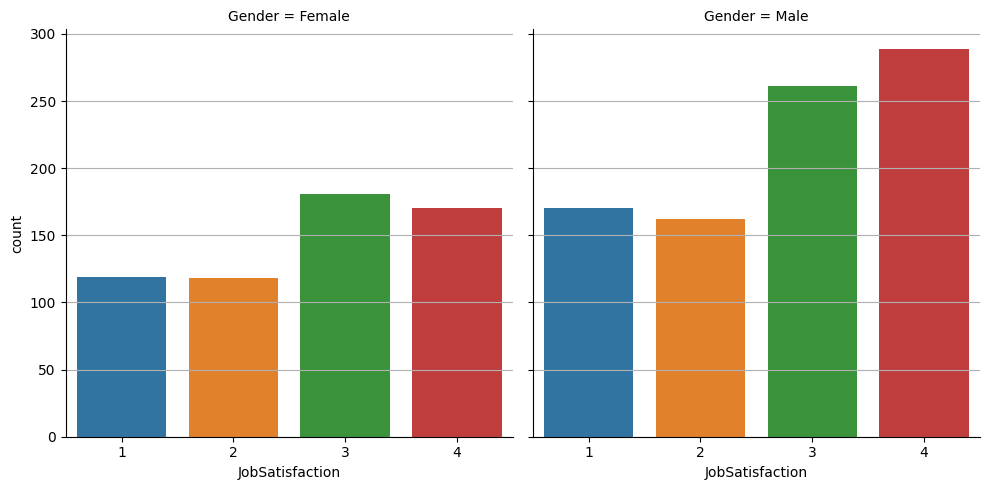

In [16]:
g = sns.catplot(x="JobSatisfaction",
                col="Gender",
                data= data,
                kind="count")

for ax in g.axes.flatten():
    ax.grid(True, axis="y")

plt.show()

c:\Users\alejo\python\bootcamp-ds-mlops\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\alejo\python\bootcamp-ds-mlops\.venv\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alejo\python\bootcamp-ds-mlops\.venv\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alejo\python\bootcamp-ds-mlops\.venv

<Axes: xlabel='JobSatisfaction', ylabel='Density'>

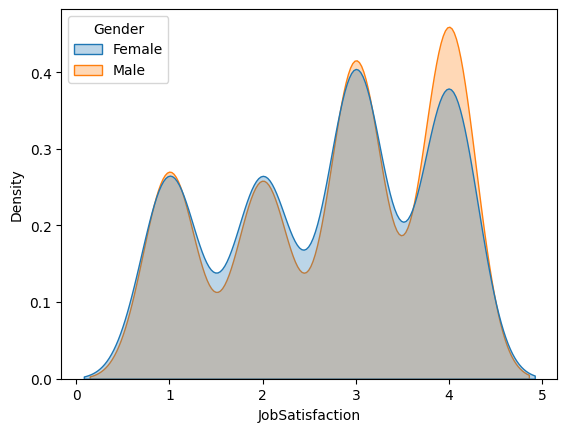

In [17]:
sns.kdeplot(data=data, x="JobSatisfaction", hue="Gender", common_norm=False, fill=True, alpha=0.3)

*Para 4) One hot encoding analicen que pasa con `data_test[['MaritalStatus_Divorced', 'MaritalStatus_Married', 'MaritalStatus_Single']]`*

In [18]:
data["MaritalStatus"].isna().value_counts()

MaritalStatus
False    1470
Name: count, dtype: int64

In [19]:
data_encoded = pd.get_dummies(data, columns=["MaritalStatus"], dummy_na=True)
data_encoded[["MaritalStatus_Divorced","MaritalStatus_Married","MaritalStatus_Single"]]

,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,False,False,True
1,False,True,False
2,False,False,True
3,False,True,False
4,False,True,False
...,...,...,...
1465,False,True,False
1466,False,True,False
1467,False,True,False
1468,False,True,False


In [20]:
# Borro variables numéricas con un valor constante para todos los registros
print(data_encoded[["EmployeeCount", "StandardHours"]].value_counts())
data_encoded = data_encoded.drop(columns=["EmployeeCount", "StandardHours"])

EmployeeCount  StandardHours
1              80               1470
Name: count, dtype: int64


<Axes: >

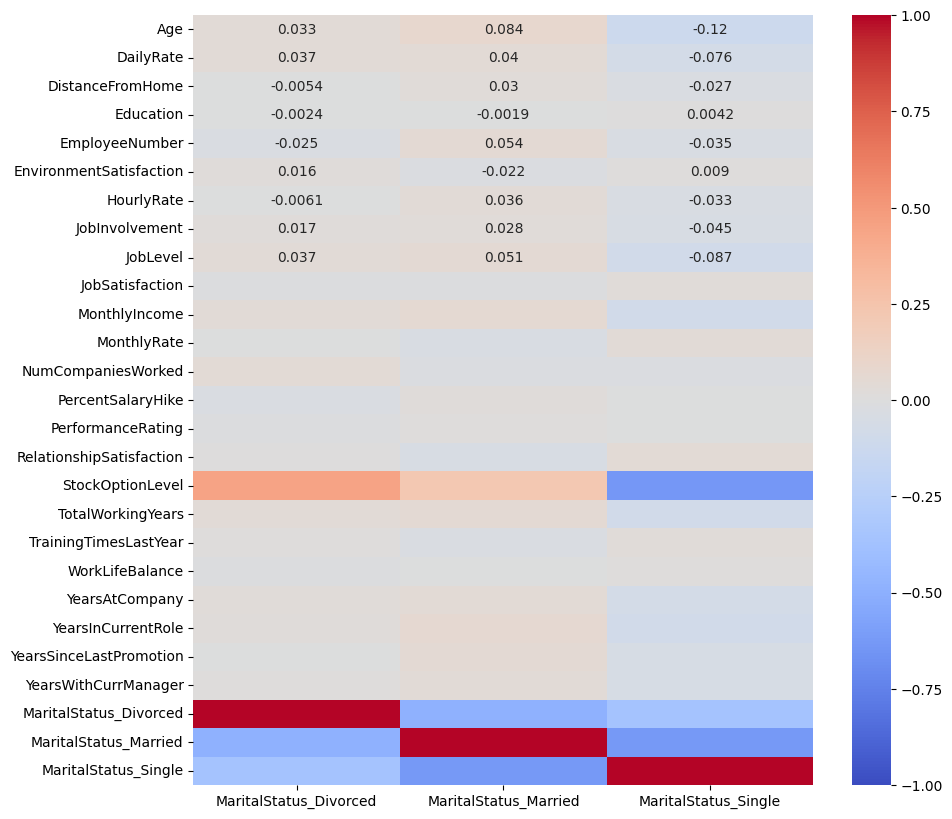

In [21]:
data_encoded_2 = data_encoded.select_dtypes(include=["int64"])
data_encoded_2[["MaritalStatus_Divorced","MaritalStatus_Married","MaritalStatus_Single"]] = data_encoded[["MaritalStatus_Divorced","MaritalStatus_Married","MaritalStatus_Single"]]

plt.figure(figsize=(10,10))
sns.heatmap(data_encoded_2.corr().loc[:,["MaritalStatus_Divorced","MaritalStatus_Married","MaritalStatus_Single"]], cmap="coolwarm", vmin=-1, vmax=1, annot=True)


In [22]:
# Análisis sin outliers

numeric_data = data.select_dtypes(include=['int', 'float'])
for col in numeric_data.columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    no_outliers = data[(data[col] > Q1 - 1.5*IQR) & (data[col] < Q3 + 1.5*IQR)]
    print(col)
    print(numeric_data[col].groupby(data['Gender']).mean().T)

Age
Gender
Female    37.329932
Male      36.653061
Name: Age, dtype: float64
DailyRate
Gender
Female    808.273810
Male      798.626984
Name: DailyRate, dtype: float64
DistanceFromHome
Gender
Female    9.210884
Male      9.180272
Name: DistanceFromHome, dtype: float64
Education
Gender
Female    2.933673
Male      2.899093
Name: Education, dtype: float64
EmployeeCount
Gender
Female    1.0
Male      1.0
Name: EmployeeCount, dtype: float64
EmployeeNumber
Gender
Female    1008.239796
Male      1035.948980
Name: EmployeeNumber, dtype: float64
EnvironmentSatisfaction
Gender
Female    2.721088
Male      2.722222
Name: EnvironmentSatisfaction, dtype: float64
HourlyRate
Gender
Female    65.903061
Male      65.883220
Name: HourlyRate, dtype: float64
JobInvolvement
Gender
Female    2.714286
Male      2.740363
Name: JobInvolvement, dtype: float64
JobLevel
Gender
Female    2.117347
Male      2.028345
Name: JobLevel, dtype: float64
JobSatisfaction
Gender
Female    2.683673
Male      2.758503
Name: J

In [23]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [24]:
no_outliers.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1456.000000,1456.000000,1456.000000,1456.000000,1456.0,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,...,1456.000000,1456.0,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000
mean,36.850275,804.364698,9.171016,2.907967,1.0,1027.241071,2.721154,65.970467,2.729396,2.052198,...,2.710852,80.0,0.796703,11.160027,2.799451,2.759615,6.875000,4.172390,2.133242,4.007555
std,9.131696,403.496540,8.092439,1.026008,0.0,602.076111,1.091293,20.318017,0.712858,1.097962,...,1.081957,0.0,0.854269,7.703157,1.292176,0.705338,5.989065,3.569028,3.144640,3.382685
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,492.750000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,35.500000,805.000000,7.000000,3.000000,1.0,1025.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1162.000000,14.000000,4.000000,1.0,1558.500000,4.000000,84.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,2.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,14.000000


# Insights

- Los hombres tienden a dar la máxima calificación con la satisfacción con el trabajo más frecuentemente que las mujeres, que parecen estar un levemente menos satisfechas.

- Hay correlación entre el stockOptionLevel y el status marital, donde las personas solteras tienen correlación marcadamente negativa, mientras que con los casados es positiva y con los divorciados es de casi el doble de positiva que con los casados. 

- No hay correlación entre StockOptionLevel y JobLevel

Quitando outliers, podemos observar que, en promedio:
- Las mujeres tienden a trabajar más tiempo en la misma empresa
- Las mujeres tienden a trabajar más tiempo en el mismo rol
- Las mujeres en promedio tienen un mayor salario
- Podemos decir que el tiempo de trabajo en empresas anteriores es menor para las mujeres, teniendo en cuenta que la edad y cantidad de años trabajados es similar y que el tiempo en su trabajo actual es mayor

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c27265a8-c197-4760-9fa1-20109eb214ff' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>